# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
import numpy as np

In [2]:
A=np.array([[3,1],
           [2,1]])
b=np.array([1,0])
np.linalg.inv(A)@b # @ -> multiplicación matricial
                   # linalg.inv -> función inversa del paquete de álgebra lineal

array([ 1., -2.])

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [3]:
A=np.array([[1,0,0],
           [1,1,1],
           [1,2,4]])
b=np.array([1,0,1])
np.linalg.inv(A)@b

array([ 1., -2.,  1.])

In [4]:
import matplotlib.pyplot as plt

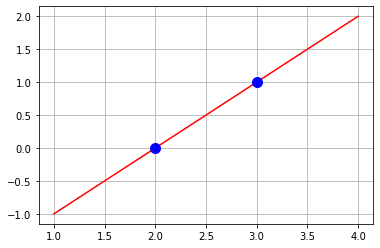

In [9]:
x=np.linspace(1,4,100)
y=x-2
plt.plot(x,y,'r')
plt.plot([3,2],[1,0],'ob',ms=10)
plt.grid()

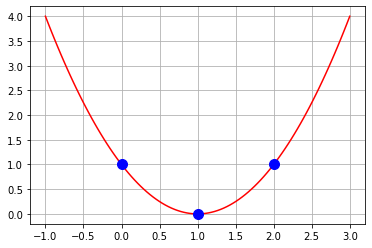

In [8]:
x=np.linspace(-1,3,100)
y=1-2*x+x**2
plt.plot(x,y,'r')
plt.plot([0,1,2],[1,0,1],'ob',ms=10)
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [2]:
import matplotlib.pyplot as plt

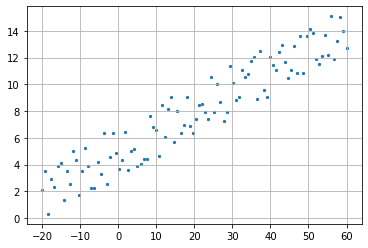

In [8]:
x=np.linspace(-20,60,100)
m=1.5/10
b=5
y=m*x+b+4*np.random.rand(100)-2
plt.scatter(x,y,s=5)
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [9]:
import scipy.optimize as opt

In [10]:
opt.minimize?

In [11]:
def fun(beta,x,y):
    f=beta[0]+beta[1]*x
    return np.sum((f-y)**2)

In [13]:
beta0=np.random.rand(2) # Valores iniciales aleatorios de dimensión 2
sol=opt.minimize(fun,beta0,args=(x,y))
sol

      fun: 151.7426234374615
 hess_inv: array([[ 8.67574263e-03, -1.83787130e-04],
       [-1.83787130e-04,  9.18935646e-06]])
      jac: array([-3.81469727e-06, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([4.87136328, 0.15253869])

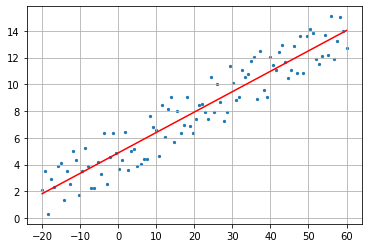

In [14]:
beta=sol.x
f=beta[0]+beta[1]*x
plt.plot(x,f,'r')
plt.scatter(x,y,s=5)
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [17]:
n=5
for i in range(n+1):
    print(i)

0
1
2
3
4
5


In [18]:
x=2
[x**i for i in range(n+1)]

[1, 2, 4, 8, 16, 32]

In [19]:
def fun(beta,x,y,n):
    f=np.dot(beta,[x**i for i in range(n+1)])
    return np.sum((y-f)**2)

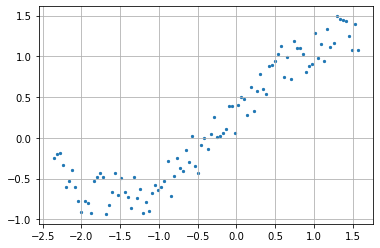

In [21]:
x=np.linspace(-3*np.pi/4,np.pi/2,100)
y=np.sin(x)+0.6*np.random.rand(100)
plt.scatter(x,y,s=5) # s -> Size
plt.grid()

In [22]:
beta0=np.random.rand(2)
sol1=opt.minimize(fun,beta0,args=(x,y,1))
sol1

      fun: 8.663323500907016
 hess_inv: array([[0.00558812, 0.00149763],
       [0.00149763, 0.00381369]])
      jac: array([ 3.57627869e-07, -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([0.362662  , 0.60363555])

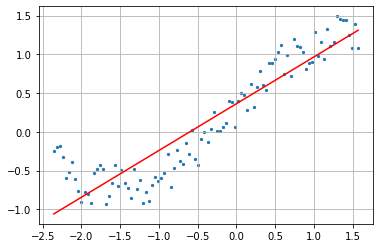

In [24]:
f=np.dot(sol1.x,[x**i for i in range(2)])
plt.plot(x,f,'r')
plt.scatter(x,y,s=5)
plt.grid()

In [25]:
beta0=np.random.rand(3)
sol2=opt.minimize(fun,beta0,args=(x,y,2))
sol2

      fun: 5.679720213565332
 hess_inv: array([[ 0.01045575, -0.00180705, -0.00420765],
       [-0.00180705,  0.00605726,  0.00285661],
       [-0.00420765,  0.00285661,  0.00363715]])
      jac: array([-2.38418579e-07,  8.94069672e-07,  3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([0.19223262, 0.71934154, 0.14732144])

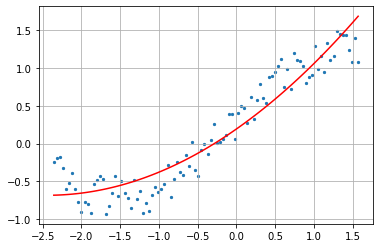

In [27]:
f=np.dot(sol2.x,[x**i for i in range(3)])
plt.plot(x,f,'r')
plt.scatter(x,y,s=5)
plt.grid()

In [28]:
beta0=np.random.rand(4)
sol3=opt.minimize(fun,beta0,args=(x,y,3))
sol3

      fun: 2.589206346912535
 hess_inv: array([[ 0.01271407,  0.00334481, -0.00739452, -0.00271582],
       [ 0.00334481,  0.01825278, -0.00456826, -0.00643147],
       [-0.00739452, -0.00456826,  0.00818444,  0.00391505],
       [-0.00271582, -0.00643147,  0.00391505,  0.00339173]])
      jac: array([-3.87430191e-07,  3.03983688e-06, -6.49690628e-06,  3.61204147e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 200
      nit: 5
     njev: 38
   status: 2
  success: False
        x: array([ 0.32140518,  1.00227497, -0.02839226, -0.14915041])

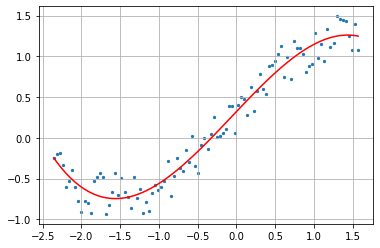

In [29]:
f=np.dot(sol3.x,[x**i for i in range(4)])
plt.plot(x,f,'r')
plt.scatter(x,y,s=5)
plt.grid()

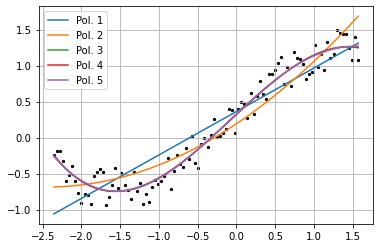

In [31]:
sol=[]
N=5
for n in range(1,N+1):
    # print(n)
    beta0=np.random.rand(n+1)
    sol.append(opt.minimize(fun,beta0,args=(x,y,n)))
    f=np.dot(sol[-1].x,[x**i for i in range(n+1)])
    plt.plot(x,f,label='Pol. '+str(n))
plt.scatter(x,y,c='k',s=5)
plt.legend(loc='best')
plt.grid()

In [32]:
sol

[      fun: 8.663323500907001
  hess_inv: array([[ 1.15683806, -0.03366924],
        [-0.03366924,  0.00488792]])
       jac: array([9.53674316e-07, 3.45706940e-06])
   message: 'Optimization terminated successfully.'
      nfev: 15
       nit: 2
      njev: 5
    status: 0
   success: True
         x: array([0.36266201, 0.60363557]),
       fun: 5.679720213565284
  hess_inv: array([[ 0.97875239,  0.38245973, -0.18702263],
        [ 0.38245973,  0.15855284, -0.06969318],
        [-0.18702263, -0.06969318,  0.03815272]])
       jac: array([1.90734863e-06, 1.19209290e-07, 6.55651093e-06])
   message: 'Optimization terminated successfully.'
      nfev: 28
       nit: 3
      njev: 7
    status: 0
   success: True
         x: array([0.19223262, 0.71934155, 0.14732145]),
       fun: 2.5892063469136724
  hess_inv: array([[ 0.01315523,  0.00410576, -0.00787975, -0.00311698],
        [ 0.00410576,  0.0190084 , -0.00518659, -0.00682728],
        [-0.00787975, -0.00518659,  0.00863232,  0.004240

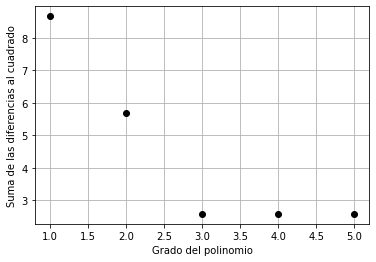

In [35]:
for n in range(N):
    plt.plot(n+1,sol[n].fun,'ok')
plt.xlabel('Grado del polinomio')
plt.ylabel('Suma de las diferencias al cuadrado')
plt.grid()

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [36]:
def ridge(beta,x,y,n,lmb):
    f=np.dot(beta,[x**i for i in range(n+1)])
    return np.sum((y-f)**2)+lmb*np.sum(beta**2)

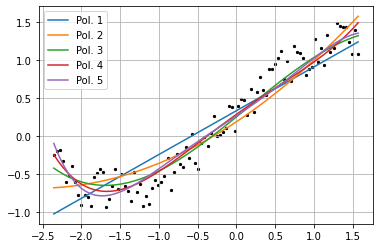

In [46]:
N=5
sol=[]
for n in range(1,N+1):
    beta0=np.random.rand(n+1)
    sol.append(opt.minimize(ridge,beta0,args=(x,y,n,5)))
    f=np.dot(sol[-1].x,[x**i for i in range(n+1)])
    plt.plot(x,f,label='Pol. '+str(n))
plt.scatter(x,y,c='k',s=5)
plt.legend(loc='best')
plt.grid()

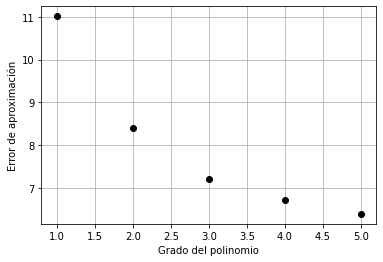

In [47]:
for n in range(N):
    plt.plot(n+1,sol[n].fun,'ok')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error de aproximación')
plt.grid()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [43]:
def lasso(beta,x,y,n,lmb):
    f=np.dot(beta,[x**i for i in range(n+1)])
    return np.sum((y-f)**2)+lmb*np.sum(np.abs(beta))

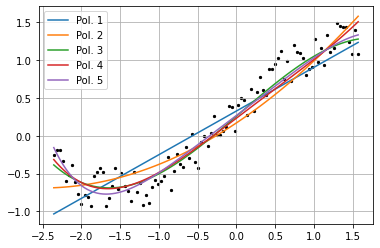

In [48]:
N=5
sol=[]
for n in range(1,N+1):
    beta0=np.random.rand(n+1)
    sol.append(opt.minimize(lasso,beta0,args=(x,y,n,5)))
    f=np.dot(sol[-1].x,[x**i for i in range(n+1)])
    plt.plot(x,f,label='Pol. '+str(n))
plt.scatter(x,y,c='k',s=5)
plt.legend(loc='best')
plt.grid()

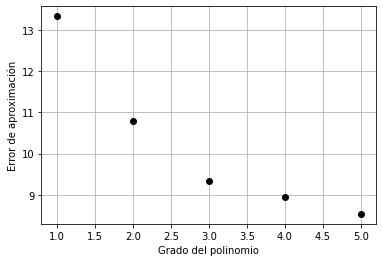

In [49]:
for n in range(N):
    plt.plot(n+1,sol[n].fun,'ok')

plt.xlabel('Grado del polinomio')
plt.ylabel('Error de aproximación')
plt.grid()